<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Property Watch

_Author: Evonne Tham_

---


# Data Cleaning

### 1. Import Libraries

In [1]:
#Import all Libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2. Read in and display Train Dataset

In [2]:
train = pd.read_csv("../datasets/train.csv") 
train.shape

(2051, 81)

In [3]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train.dtypes.value_counts()

object     42
int64      28
float64    11
dtype: int64

This dataset contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.
This Data consist of 2051 rows of observations that is broken down into information of a housing with sale price included. 

### 3. Rename Train Columns

In [6]:
# Cleaning up columns names to snake_case
train.columns = [x.replace(' ', '_').lower() for x in train.columns]
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [7]:
# Set Id as indexes 
train.set_index('id', inplace= True)
train.sort_index(inplace=True)
train.shape

(2051, 80)

In [8]:
# Drop PID as it is just another index 
# will not be affecting the sale price
train = train.drop(['pid'], axis=1)

In [9]:
train.shape

(2051, 79)

Even though pool_qu, misc_features, alley and fence has a high number of null values, I decided not to drop any other than 'pid' as I assume majority of the houses does not have those features. Hence, having any one of them might have a effect on sale price.

### 4. Imputate Missing Values

In [10]:
# Check for nulls
(train.isnull().sum())[train.isnull().sum() > 0].sort_values(ascending=False)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
garage_area          1
total_bsmt_sf        1
dtype: int64

In [11]:
# Checking for any Duplicates
train.duplicated().sum()

0

In [12]:
# Checking rows that may consist more than one NaNs
train.isnull().sum()[train.isnull().sum() == 1]

bsmtfin_sf_1     1
bsmtfin_sf_2     1
bsmt_unf_sf      1
total_bsmt_sf    1
garage_cars      1
garage_area      1
dtype: int64

In [13]:
train[train['total_bsmt_sf'].isnull()| 
      train['garage_area'].isnull() | 
      train['bsmt_unf_sf'].isnull() |
      train['bsmt_full_bath'].isnull()]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1342,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000
1498,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
2237,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [14]:
# Drop rows that consist more than one NaN
# Assumption: dropping random sample of the whole data
train = train.drop([1342, 1498, 2237])
(train.isnull().sum())[train.isnull().sum() > 0].sort_values(ascending=False)

pool_qc           2039
misc_feature      1983
alley             1908
fence             1650
fireplace_qu       998
lot_frontage       330
garage_yr_blt      113
garage_type        113
garage_finish      113
garage_qual        113
garage_cond        113
bsmt_exposure       56
bsmtfin_type_2      54
bsmtfin_type_1      53
bsmt_cond           53
bsmt_qual           53
mas_vnr_area        22
mas_vnr_type        22
dtype: int64

In [15]:
# Misc Features, Alley, Fence

for i in ['misc_feature','alley','fence']:
    train[i] = train[i].fillna('None')
(train.isnull().sum())[train.isnull().sum() > 0].sort_values(ascending=False)

pool_qc           2039
fireplace_qu       998
lot_frontage       330
garage_cond        113
garage_qual        113
garage_finish      113
garage_yr_blt      113
garage_type        113
bsmt_exposure       56
bsmtfin_type_2      54
bsmtfin_type_1      53
bsmt_cond           53
bsmt_qual           53
mas_vnr_area        22
mas_vnr_type        22
dtype: int64

In [16]:
# Lot Frontage 
# lot_frontage has a considerable amount of NaNs hence would use overall mean
# https://www.gimme-shelter.com/why-you-want-to-buy-real-estate-with-frontage-10014/
frontage_mean = train.lot_frontage.mean()
train['lot_frontage'].fillna(frontage_mean, inplace = True)
(train.isnull().sum())[train.isnull().sum() > 0].sort_values(ascending=False)

pool_qc           2039
fireplace_qu       998
garage_cond        113
garage_qual        113
garage_finish      113
garage_yr_blt      113
garage_type        113
bsmt_exposure       56
bsmtfin_type_2      54
bsmtfin_type_1      53
bsmt_cond           53
bsmt_qual           53
mas_vnr_area        22
mas_vnr_type        22
dtype: int64

In [17]:
# Garage
# There seem to be the same number of NaNs that are associated with garage 
# Hence I would assume that these 113 rows are housings that does not have garage
train['garage_finish'] = train['garage_finish'].fillna('None')
train['garage_yr_blt'] = train['garage_yr_blt'].fillna('None')
train['garage_type'] = train['garage_type'].fillna('None')
(train.isnull().sum())[train.isnull().sum() > 0].sort_values(ascending=False)

pool_qc           2039
fireplace_qu       998
garage_cond        113
garage_qual        113
bsmt_exposure       56
bsmtfin_type_2      54
bsmtfin_type_1      53
bsmt_cond           53
bsmt_qual           53
mas_vnr_area        22
mas_vnr_type        22
dtype: int64

In [18]:
# Basement
# Likewise as mentioned above, this could be house that does not have basement
for i in ['bsmtfin_type_2','bsmtfin_type_1']:
    train[i] = train[i].fillna('None')
(train.isnull().sum())[train.isnull().sum() > 0].sort_values(ascending=False)

pool_qc          2039
fireplace_qu      998
garage_cond       113
garage_qual       113
bsmt_exposure      56
bsmt_cond          53
bsmt_qual          53
mas_vnr_area       22
mas_vnr_type       22
dtype: int64

In [19]:
# Masonry
# As NaNs for Masonry is low, I would fill houses with no Masonry as zero area
train['mas_vnr_type'] = train['mas_vnr_type'].fillna('None')
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0)

In [20]:
# Convert ordinal values in variables
# Variables with Ex, Gd, TA, Fa, & Po
for x in ['exter_qual','exter_cond','kitchen_qual', 'heating_qc']:
    train[x] = train[x].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
    
for i in ['exter_qual','exter_cond','kitchen_qual', 'heating_qc']:
    train[i] = train[i].fillna('None')
    
    
# Variables with Ex, Gd, TA, Fa, Po, & NA
for y in ['bsmt_qual','bsmt_cond','fireplace_qu', 'garage_qual', 'garage_cond']:
    train[y] = train[y].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})

for i in ['bsmt_qual','bsmt_cond','fireplace_qu', 'garage_qual', 'garage_cond']:
    train[i] = train[i].fillna('None')
    
    
# Exposure 
train['bsmt_exposure'] = train['bsmt_exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})
train['bsmt_exposure'] = train['bsmt_exposure'].fillna('None')

# Pool_qc
train['pool_qc'] = train['pool_qc'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':0})
train['pool_qc'] = train['pool_qc'].fillna('None')

In [21]:
# Check again for any more nulls
(train.isnull().sum())[train.isnull().sum() > 0]

Series([], dtype: int64)

In [22]:
#Check saleprice column
train.saleprice.isnull().sum()

0

In [23]:
train.saleprice.dtype

dtype('int64')

### 5. Binarize Variable

In [24]:
train['central_air'].value_counts()

Y    1907
N     141
Name: central_air, dtype: int64

In [25]:
# Binarize Central air 
train['central_air'] = train['central_air'].map(lambda x: '1' if x == 'Y' else '0')
train['central_air'].value_counts()

1    1907
0     141
Name: central_air, dtype: int64

In [26]:
train['street'].value_counts()

Pave    2041
Grvl       7
Name: street, dtype: int64

In [27]:
# Binarize Street
train['street'] = train['street'].map(lambda x: '1' if x == 'Pave' else '2')
train['street'].value_counts()

1    2041
2       7
Name: street, dtype: int64

## Exploratory Data Analysis

### 1. Statistic Summary of Data

In [28]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ms_subclass,2048.0,57.038574,42.839004,20.0,20.00,50.000000,70.00,190.0
lot_frontage,2048.0,69.017462,21.274114,21.0,60.00,69.017462,78.00,313.0
lot_area,2048.0,10049.675293,6697.167566,1300.0,7500.00,9432.000000,11512.75,159000.0
overall_qual,2048.0,6.114258,1.426126,1.0,5.00,6.000000,7.00,10.0
overall_cond,2048.0,5.560547,1.104349,1.0,5.00,5.000000,6.00,9.0
year_built,2048.0,1971.751465,30.174112,1872.0,1954.00,1974.000000,2001.00,2010.0
year_remod/add,2048.0,1984.193848,21.033925,1950.0,1964.75,1993.000000,2004.00,2010.0
mas_vnr_area,2048.0,98.770996,174.411461,0.0,0.00,0.000000,160.00,1600.0
exter_qual,2048.0,3.406738,0.588187,2.0,3.00,3.000000,4.00,5.0
exter_cond,2048.0,3.085938,0.373051,1.0,3.00,3.000000,3.00,5.0


The standard deviation of the saleprice seem to be very high hence further exploration is required. 

### 2. The Distribution of SalesPrice

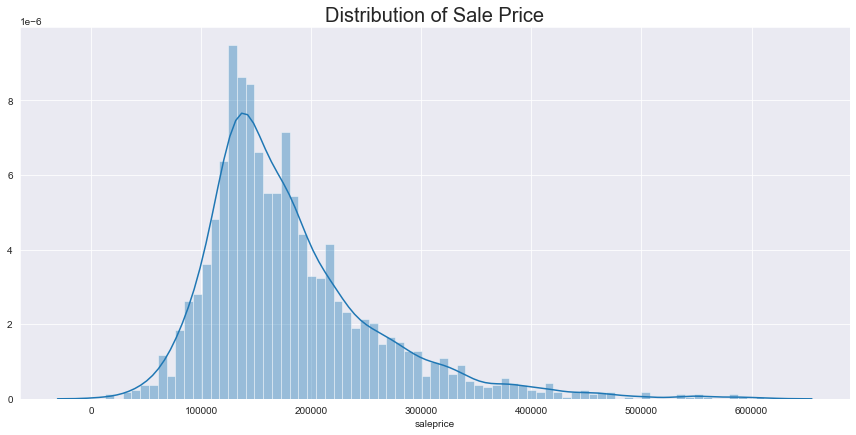

In [29]:
plt.figure(figsize =(12,6))
sns.distplot(train['saleprice'], kde= True, bins=75)
plt.tight_layout()
plt.title('Distribution of Sale Price', fontsize = 20);

The average sale price is 181484, with a large standard deviation of 79248. The cheapest home is 12789 while the most expensive is around 611657. The median sales price was 162500, which is slightly below the average sales price. 

As for the distribution, it is positively skewed. 

### 3. Heatmap of the Correlation

In [30]:
# ## ******FOR PRESENTATION********
# plt.figure(figsize = (15,18))
# train_corr = train.corr()[['saleprice']].sort_values('saleprice', ascending=False)
# sns.heatmap(train_corr, annot = True, cmap='coolwarm');

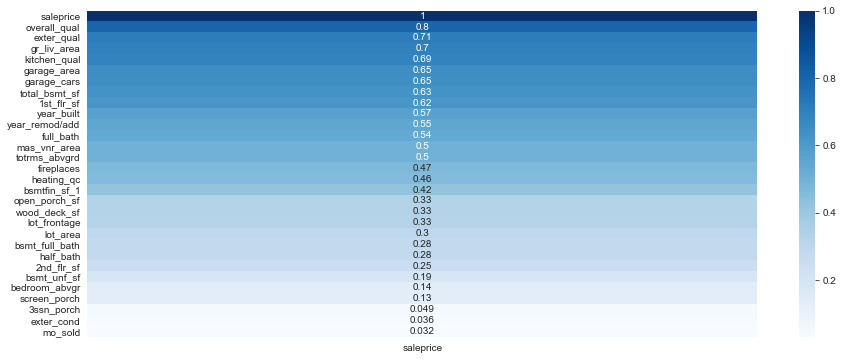

In [31]:
# Variables has highest positive correlation against Sale Price
plt.figure(figsize = (15,6))
train_corr = train.corr()[['saleprice']].sort_values('saleprice', ascending=False)
positive_corr = train_corr.head(30)

sns.heatmap(positive_corr, annot = True, cmap='Blues');

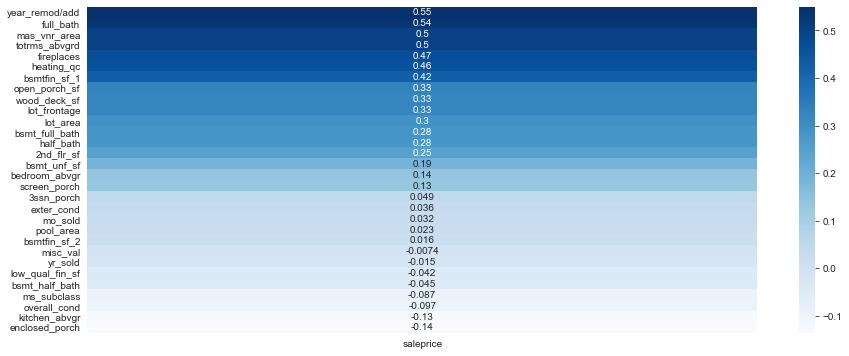

In [32]:
# Variables has highest negative correlation against Sale Price
plt.figure(figsize = (15,6))
neg_corr = train_corr.tail(30)
sns.heatmap(neg_corr, annot = True, cmap='Blues');

### 4. Scatterplots 

In [33]:
train.corr()['saleprice'].sort_values(ascending=False).head(15)

saleprice         1.000000
overall_qual      0.800975
exter_qual        0.712880
gr_liv_area       0.698046
kitchen_qual      0.692190
garage_area       0.650000
garage_cars       0.648103
total_bsmt_sf     0.631507
1st_flr_sf        0.621181
year_built        0.572256
year_remod/add    0.550055
full_bath         0.537369
mas_vnr_area      0.504025
totrms_abvgrd     0.502909
fireplaces        0.470091
Name: saleprice, dtype: float64

In [34]:
train.corr()['saleprice'].sort_values(ascending=False).tail(15)

bedroom_abvgr      0.135178
screen_porch       0.134652
3ssn_porch         0.048755
exter_cond         0.036409
mo_sold            0.031868
pool_area          0.023115
bsmtfin_sf_2       0.016393
misc_val          -0.007398
yr_sold           -0.015330
low_qual_fin_sf   -0.041650
bsmt_half_bath    -0.045378
ms_subclass       -0.087383
overall_cond      -0.097118
kitchen_abvgr     -0.125593
enclosed_porch    -0.135516
Name: saleprice, dtype: float64

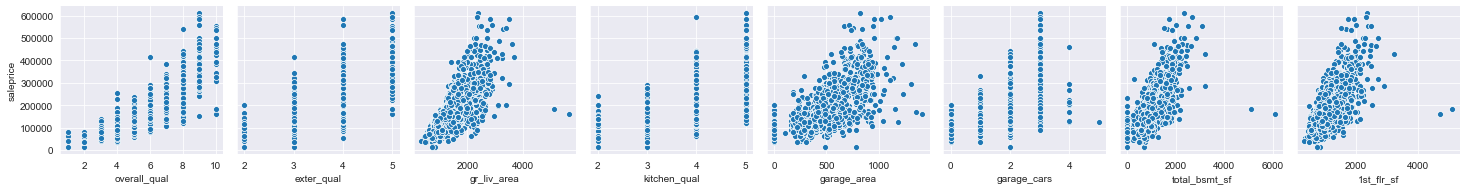

In [35]:
# Picking out the top correlation coefficient values 
# that are >= +0.6 <= -0.6 
sns.pairplot(train,
             y_vars = ['saleprice'],
             x_vars = ['overall_qual', 'exter_qual', 'gr_liv_area', 
                       'kitchen_qual', 'garage_area', 'garage_cars', 
                       'total_bsmt_sf', '1st_flr_sf']);


These variables have a relative strong postitive correlation to sale price. however, I have noticed two particular property that lies outside of the normal. They are of very high square feet but were sold at her very low price. 

### 6. Boxplot

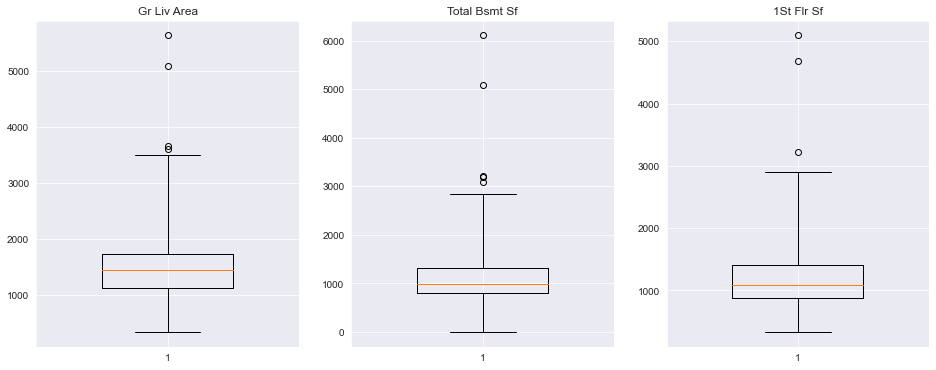

In [36]:
#using boxplot to highlight the outliers
box_list = ['gr_liv_area', 
            'total_bsmt_sf', 
            '1st_flr_sf']

fig, ax = plt.subplots(1,3,figsize=(16, 6))
ax = ax.ravel()

for i, col in enumerate(box_list): 
    ax[i].boxplot(train[col], widths=[0.5], whis=3)
    ax[i].set_title(col.replace('_',' ').title(),fontsize=12)

### 7. Outlier

In [37]:
#Taking a closer look at gr_liv_area, total_bsmt_sf, 1st_flr_sf
#These property are indeed the outliers hence choosing to remove them

print((train['gr_liv_area'])[train['gr_liv_area'] > 3500])
print((train['1st_flr_sf'])[train['1st_flr_sf'] > 3500])
print((train['total_bsmt_sf'])[train['total_bsmt_sf'] > 3500])

id
1499    5642
2181    5095
2667    3608
2738    3672
Name: gr_liv_area, dtype: int64
id
1499    4692
2181    5095
Name: 1st_flr_sf, dtype: int64
id
1499    6110.0
2181    5095.0
Name: total_bsmt_sf, dtype: float64


In [38]:
train.shape

(2048, 79)

In [39]:
train.drop([1499, 2181, 2667, 2738], inplace=True)

In [40]:
train.shape

(2044, 79)

In [41]:
#Saving cleaned Data
train_cleaned = train
train_cleaned.to_csv('../datasets/train_cleaned.csv')